In [1]:
#  Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [237]:
# loadmat aux function to load the matlab save files
# from: https://stackoverflow.com/review/suggested-edits/21667510

import scipy.io as spio

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    def _check_keys(d):
        '''
        checks if entries in dictionary are mat-objects. If yes
        todict is called to change them to nested dictionaries
        '''
        for key in d:
            if isinstance(d[key], spio.matlab.mio5_params.mat_struct):
                d[key] = _todict(d[key])
        return d

    def _has_struct(elem):
        """Determine if elem is an array and if any array item is a struct"""
        return isinstance(elem, np.ndarray) and any(isinstance(
                    e, scipy.io.matlab.mio5_params.mat_struct) for e in elem)

    def _todict(matobj):
        '''
        A recursive function which constructs from matobjects nested dictionaries
        '''
        d = {}
        for strg in matobj._fieldnames:
            elem = matobj.__dict__[strg]
            if isinstance(elem, spio.matlab.mio5_params.mat_struct):
                d[strg] = _todict(elem)
            elif _has_struct(elem):
                d[strg] = _tolist(elem)
            else:
                d[strg] = elem
        return d

    def _tolist(ndarray):
        '''
        A recursive function which constructs lists from cellarrays
        (which are loaded as numpy ndarrays), recursing into the elements
        if they contain matobjects.
        '''
        elem_list = []
        for sub_elem in ndarray:
            if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):
                elem_list.append(_todict(sub_elem))
            elif _has_struct(sub_elem):
                elem_list.append(_tolist(sub_elem))
            else:
                elem_list.append(sub_elem)
        return elem_list
    data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

In [261]:
# Matlab code conversion

# Read matlab file instead of excelfile (easier conversion)
data = loadmat('matlab.mat')

In [259]:
data['data']['load']['limit'][0]

array([[27.624915 , 11.049966 ,  2.7624915,  2.7624915,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [25.594785 , 10.237914 ,  2.5594785,  2.5594785,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [24.058485 ,  9.623394 ,  2.4058485,  2.4058485,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [23.55183  ,  9.420732 ,  2.355183 ,  2.355183 ,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [23.508765 ,  9.403506 ,  2.3508765,  2.3508765,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [23.76297  ,  9.505188 ,  2.376297 ,  2.376297 ,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [24.714585 ,  9.885834 ,  2.4714585,  2.4714585,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [26.378055 , 10.551222 ,  2.637805

In [240]:
import procsimulator
import os

from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.ConsumptionGenerator import ConsumptionGenerator

from procsimulator.DataFromSmile import DataFromSmile
from procsimulator.RenewableEnergyGenerator import RenewableEnergyGenerator
from procsimulator.CommunityGenerator import CommunityGenerator

Creating simulation files for each user
Creating simulation file for users of house 0
Creating simulation file for user Ann
Creating simulation file for user baseload
Creating simulation file for users of house 1
Creating simulation file for user Ann
Creating simulation file for user baseload
Creating simulation file for users of house 2
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user baseload
Creating simulation file for users of house 3
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user John
Creating simulation file for user Toby
Creating simulation file for user baseload
Creating simulation file for users of house 4
Creating simulation file for user Ann
Creating simulation file for user Bill
Creating simulation file for user John
Creating simulation file for user baseload
Creating simulation files for each house
Creating simulation file for house 0
Creating simu

Resampling the data of file total.csv of house 3
Resampling the data of file TV.csv of house 3
Resampling the data of file use_a_personal_computer.csv of house 3
Resampling the data of file VACUUMCLEANER.csv of house 3
Resampling the data of file vacuuming.csv of house 3
Resampling the data of file WASHINGMACHINE.csv of house 3
Resampling the data of file washing_a_load_of_laundry.csv of house 3
Resampling the data of file watching_TV.csv of house 3
Resampling the files of HOUSE 4
Resampling the data of file AMPLIFIER.csv of house 4
Resampling the data of file Ann.csv of house 4
Resampling the data of file baseload.csv of house 4
Resampling the data of file Bill.csv of house 4
Resampling the data of file BREADCUTTER.csv of house 4
Resampling the data of file CDPLAYER.csv of house 4
Resampling the data of file COFFEEMAKER.csv of house 4
Resampling the data of file COOKINGSTOVE.csv of house 4
Resampling the data of file cooking_a_dinner.csv of house 4
Resampling the data of file DISHWASH

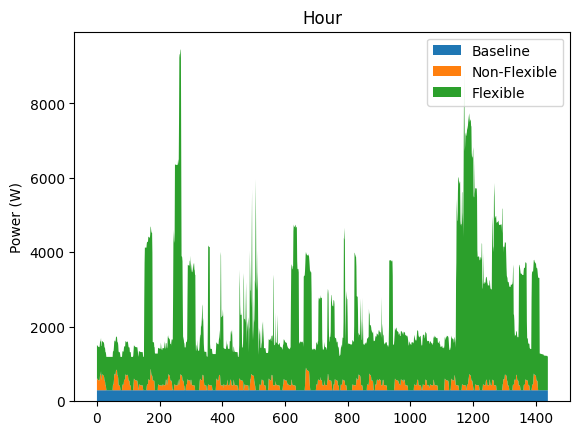

In [241]:
current_path = os.getcwd()

path_steps_seconds = os.path.join(current_path, "output/house")
path_steps_minutes = "output/minute"
path_steps_after_first = "output/afteroptimization"
path_steps_after_second = "output/aftersecoptimization"

config_files_path = "output/house"

cg = ConsumptionGenerator("data.json", path_steps_seconds, path_steps_minutes)
cg.execute("1", "houses", True, False)

Renewable Energy Generator
Calculating the contracted power of the community
energy contracted: 14950.0


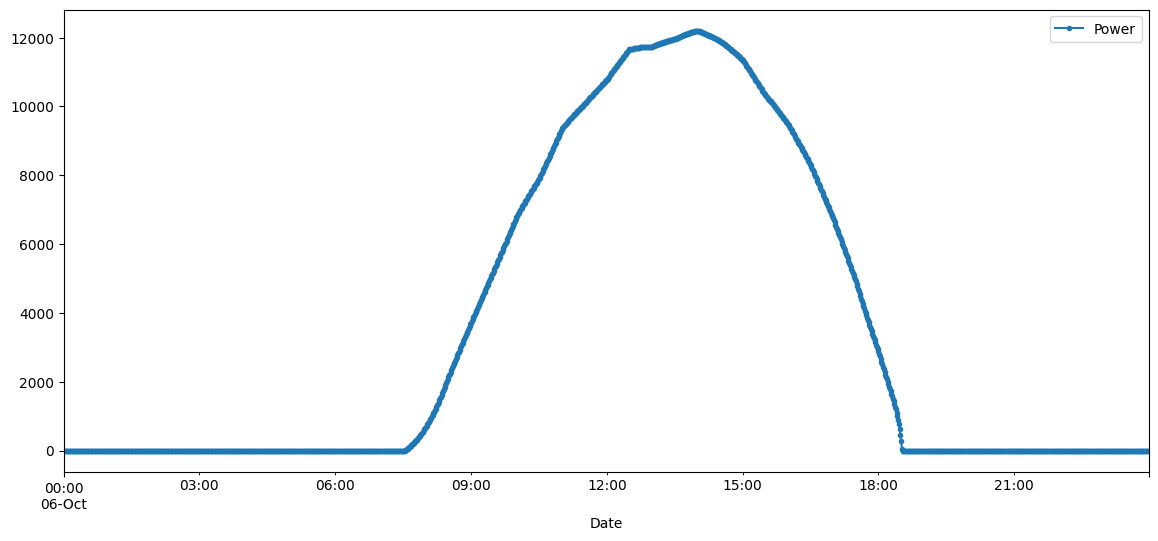

In [242]:
dat = DataFromSmile("https://ems.prsma.com/solcast/public/Fazendinha_solcast-radiation-historical_30min.csv")
reg = RenewableEnergyGenerator(cg, dat, cg.path_steps_minutes)

reg.execute()

In [243]:
cmg = CommunityGenerator(cg.path_steps_seconds, cg.path_steps_minutes)
cmg.execute()

Calculating netload of the community


In [244]:
house_total_df[:3]

,Demand
Date,
2022-10-06 00:00:00,269.223667
2022-10-06 01:00:00,238.111833
2022-10-06 02:00:00,238.111833


In [263]:
data['data']['load']['limit'][1]

array([[4.04042175, 1.6161687 , 0.40404218, 0.40404218, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.77700975, 1.5108039 , 0.37770097, 0.37770097, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.624993  , 1.4499972 , 0.3624993 , 0.3624993 , 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.59686575, 1.4387463 , 0.35968658, 0.35968658, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.68151075, 1.4726043 , 0.36815107, 0.36815107, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.88089225, 1.5523569 , 0.38808922, 0.38808922, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [4.47363   , 1.789452  , 0.447363  , 0.447363  , 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [5.770359  , 2.3081436 , 0.5770359

In [264]:
pv_df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
pv_df.columns = ['Date', 'Demand', 'Production', 'Netload']
pv_df['Date'] = pd.to_datetime(pv_df['Date'])
print(pv_df)

                    Date       Demand  Production      Netload
0    2022-10-06 00:00:00  1207.923333         0.0  1207.923333
1    2022-10-06 00:01:00  1207.418333         0.0  1207.418333
2    2022-10-06 00:02:00  1192.468333         0.0  1192.468333
3    2022-10-06 00:03:00  1180.288333         0.0  1180.288333
4    2022-10-06 00:04:00  1171.603333         0.0  1171.603333
...                  ...          ...         ...          ...
1434 2022-10-06 23:54:00   924.323333         0.0   924.323333
1435 2022-10-06 23:55:00   923.390000         0.0   923.390000
1436 2022-10-06 23:56:00   922.461667         0.0   922.461667
1437 2022-10-06 23:57:00   921.531667         0.0   921.531667
1438 2022-10-06 23:58:00   909.196667         0.0   909.196667

[1439 rows x 4 columns]


In [265]:
pv_df = pv_df.resample('1H', on='Date').mean()
print(pv_df)

                          Demand    Production       Netload
Date                                                        
2022-10-06 00:00:00  1099.036167      0.000000   1099.036167
2022-10-06 01:00:00  1115.673917      0.000000   1115.673917
2022-10-06 02:00:00  2368.110444      0.000000   2368.110444
2022-10-06 03:00:00  1178.046667      0.000000   1178.046667
2022-10-06 04:00:00  4074.866861      0.000000   4074.866861
2022-10-06 05:00:00  2016.054833      0.000000   2016.054833
2022-10-06 06:00:00  1399.054444      0.000000   1399.054444
2022-10-06 07:00:00  1516.077750    129.908708   1386.169042
2022-10-06 08:00:00  2099.640444   2110.717767    -11.077323
2022-10-06 09:00:00  1336.903028   5207.061245  -3870.158218
2022-10-06 10:00:00  2326.722000   7957.029683  -5630.307683
2022-10-06 11:00:00  2386.968139  10060.423418  -7673.455279
2022-10-06 12:00:00  1551.589972  11461.123815  -9909.533842
2022-10-06 13:00:00  2018.606889  11974.786499  -9956.179610
2022-10-06 14:00:00  153

In [268]:
import pandas as pd
import os


community_size = len(cg.get_community())
data['data']['parameterData']['resources']['numGen'] = 1
data['data']['parameterData']['resources']['numLoad'] = community_size

data['data']['load']['limit'] = data['data']['load']['limit'][:community_size]
data['data']['load']['info'] = data['data']['load']['info'][:community_size]

data['data']['generator']['limit'] = data['data']['generator']['limit'][0]
data['data']['generator']['info'] = data['data']['generator']['info'][0]

for x in os.walk(path_steps_minutes):
    if x[0] is not path_steps_minutes:
        print(x[0])
        house_total_df = pd.read_csv(x[0] + '/total.csv', sep=';')
        house_total_df.columns = ['Date', 'Demand']
        house_total_df['Date'] = pd.to_datetime(house_total_df['Date'])
        house_total_df.set_index('Date')
        
        house_total_df = house_total_df.resample('1H', on='Date').mean()
                
        pos = int(x[0].split("house")[1])
        for y in range(len(data['data']['load']['limit'][pos])):
            data['data']['load']['limit'][pos][y][0] = house_total_df.iloc[y]["Demand"]/1000
            data['data']['load']['limit'][pos][y][1] = 0
            data['data']['load']['limit'][pos][y][2] = house_total_df.iloc[y]["Demand"]/1000*0.01
            data['data']['load']['limit'][pos][y][3] = house_total_df.iloc[y]["Demand"]/1000*0.01
            print(house_total_df.iloc[y]["Demand"])

output/minute\house0
148.76205555555555
152.9688611111111
1420.401111111111
243.19580555555555
523.9873611111111
228.93505555555555
152.7445833333333
201.38166666666666
276.55916666666667
180.2176111111111
169.30652777777777
169.0451666666667
142.5075
180.63894444444443
170.40900000000002
363.39838888888886
156.1195277777778
170.69013888888887
179.7211388888889
823.4722777777778
365.5612222222222
134.92452777777777
154.79819444444445
105.41705555555556
output/minute\house1
134.11183333333332
142.41347222222223
148.23175
140.12008333333333
136.7938611111111
134.11183333333332
134.11183333333332
156.35422222222223
194.79038888888888
245.36866666666666
158.05372222222223
183.0476666666667
169.38933333333335
168.6561388888889
225.27763888888887
375.74802777777774
172.94963888888887
170.3056111111111
165.14177777777778
621.7049166666667
633.2513333333334
168.64411111111113
173.31374999999997
164.38483333333335
output/minute\house2
224.94972222222222
214.78119444444442
193.11197222222225
214

In [284]:
#Add Production (Generator with type = 2 - Renewables)
for i in range(len(data['data']['generator']['limit'])):
    data['data']['generator']['limit'][i][0] = pv_df.iloc[i]["Production"]/1000

In [177]:
#for x in range(len(data['data']['load']['limit'])):
    #for y in range(len(data['data']['load']['limit'][x])):
        #data['data']['load']['limit'][x][y][1] = 0
        #print(house_total_df.iloc[y]["Demand"])
        

In [285]:
data['data']['generator']['limit']

array([[ 0.        ,  0.        ,  0.08      ,  0.        ,  4.5       ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08      ,  0.        ,  4.5       ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08      ,  0.        ,  4.5       ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08      ,  0.        ,  4.5       ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08      ,  0.        ,  4.5       ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08      ,  0.        ,  4.5       ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08      ,  0.        ,  4.5       ,
         0.        ,  0.        ,  0.        ],
       [ 0.12990871,  0.        ,  0.08      ,  0.        ,  4.5       ,
         0.        ,  0.        ,  0.        ],
       [ 2.11071777,  0.        

In [183]:
data['data']['load']['limit'][1]

array([[1.34910306e-01, 0.00000000e+00, 1.34910306e-03, 1.34910306e-03,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [1.34910306e-01, 0.00000000e+00, 1.34910306e-03, 1.34910306e-03,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [1.34910306e-01, 0.00000000e+00, 1.34910306e-03, 1.34910306e-03,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [1.34910306e-01, 0.00000000e+00, 1.34910306e-03, 1.34910306e-03,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [1.43346283e+00, 0.00000000e+00, 1.43346283e-02, 1.43346283e-02,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [3.08826361e-01, 0.00000000e+00, 3.08826361e-03, 3.08826361e-03,
   